# DONE

The information I found are on HF tutorial: <br> https://huggingface.co/learn/nlp-course/chapter1/3?fw=pt<p>
The module information for DistillBERT can be found here:<br> https://huggingface.co/docs/transformers/main/en/model_doc/distilbert

In [110]:
#Install Transformers
!pip install datasets evaluate transformers[sentencepiece]

In [118]:
#Mock inputs
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I love this so much!",
    "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."]

In [112]:
#Using pipeline to visualize word vectors
from transformers import pipeline #using pipeline
import numpy as np
import pandas as pd
import matplotlib as plt
embedder = pipeline("feature-extraction", model="distilbert-base-uncased")
#vectors= np.array(embedder0(raw_inputs))

In [152]:
print(len(embedder(raw_inputs[0])[0][0])) # let's see the vectors

768


In [ ]:
embedder(raw_inputs[1])

In [ ]:
embedder(raw_inputs[2])

In [131]:
first_0 = (np.array(embedder(raw_inputs[0])))
print(first_0, "\n")
data_0 = np.squeeze(first_0) # squeeze out useless dimension
print(data_0) # make a vector matrix in 2d

first_1 = (np.array(embedder(raw_inputs[1])))
#print(first_1, "\n")
data_1 = np.squeeze(first) # squeeze out useless dimension
#print(data_1) # make a vector matrix in 2d

first_2 = (np.array(embedder(raw_inputs[2])))
#print(first_2, "\n")
data_2 = np.squeeze(first_2) # squeeze out useless dimension
#print(data_2) # make a vector matrix in 2d

[[[ 0.06210867 -0.01878557 -0.0515706  ... -0.08163124  0.31009319
    0.31061476]
  [ 0.54212815  0.18186343 -0.27592456 ... -0.09778926  0.58453661
    0.27318814]
  [ 0.93273109  0.06828158 -0.25945604 ... -0.03801346 -0.56732249
   -0.56310117]
  ...
  [ 0.34953079  0.01941936 -0.17897096 ... -0.48131502  0.03435946
    0.18008307]
  [ 0.66500723 -0.10907529 -0.51303118 ...  0.22663383 -0.34393558
   -0.58414763]
  [ 0.28803992  0.12344454  0.07254635 ...  0.36751512  0.21785465
   -0.33491826]]] 

[[ 0.06210867 -0.01878557 -0.0515706  ... -0.08163124  0.31009319
   0.31061476]
 [ 0.54212815  0.18186343 -0.27592456 ... -0.09778926  0.58453661
   0.27318814]
 [ 0.93273109  0.06828158 -0.25945604 ... -0.03801346 -0.56732249
  -0.56310117]
 ...
 [ 0.34953079  0.01941936 -0.17897096 ... -0.48131502  0.03435946
   0.18008307]
 [ 0.66500723 -0.10907529 -0.51303118 ...  0.22663383 -0.34393558
  -0.58414763]
 [ 0.28803992  0.12344454  0.07254635 ...  0.36751512  0.21785465
  -0.33491826]]


In [132]:
## Get the number of dimensions for each vector:
print("Number of vectors: ", len(data_0))
print("Dimensions: ", len(data_0[0]), "\n")

print("Number of vectors: ", len(data_1))
print("Dimensions: ", len(data_1[0]), "\n")

print("Number of vectors: ", len(data_2))
print("Dimensions: ", len(data_2[0]), "\n")

Number of vectors:  16
Dimensions:  768 

Number of vectors:  8
Dimensions:  768 

Number of vectors:  160
Dimensions:  768 



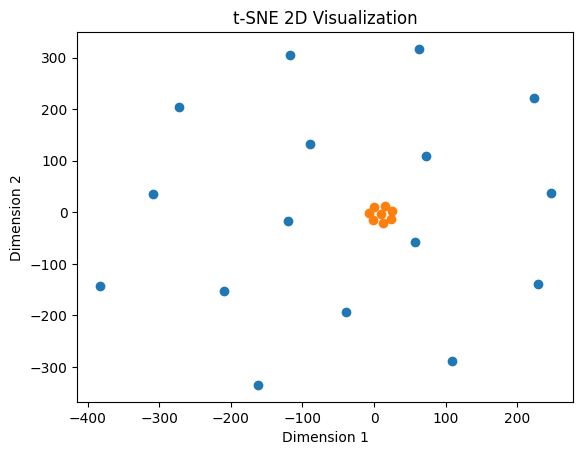

In [139]:
#OPTION1: T-Distributed Stochaistic Neighbor Embedding
# Nonlinear transformation. Similar vectors are close points while dissimilar points are distant
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce dimension to 2D
tsne = TSNE(n_components=2, perplexity=15, random_state=0) # look more into randomness
reduced_data_0 = tsne.fit_transform(data_0)

tsne_1 = TSNE(n_components=2, perplexity=7, random_state=0) # look more into randomness
reduced_data_1 = tsne_1.fit_transform(data_1)


# Plotting the results
plt.scatter(reduced_data_0[:, 0], reduced_data_0[:, 1])
plt.scatter(reduced_data_1[:, 0], reduced_data_1[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE 2D Visualization')
plt.show()


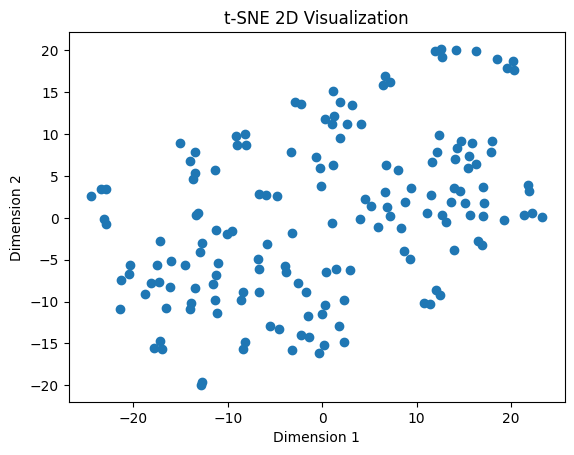

In [140]:
tsne_2 = TSNE(n_components=2, perplexity=159, random_state=0) # look more into randomness
reduced_data_2 = tsne.fit_transform(data_2)

plt.scatter(reduced_data_2[:, 0], reduced_data_2[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE 2D Visualization')
plt.show()

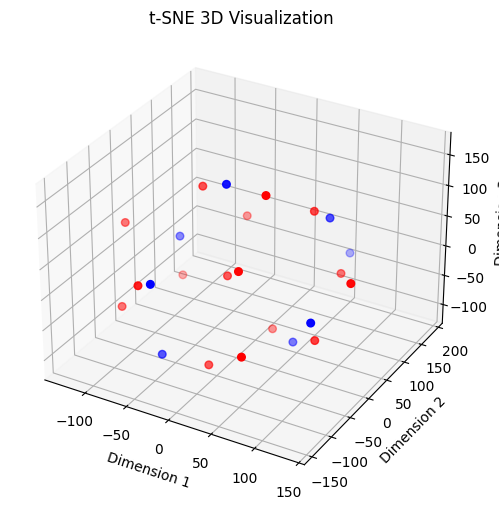

In [141]:
# Use t-SNE to reduce dimension to 2D
tsne2 = TSNE(n_components=3, perplexity=15, random_state=0)
reduced_data = tsne2.fit_transform(data_0)

tsne2_1 = TSNE(n_components=3, perplexity=7, random_state=0)
reduced_data_1 = tsne2_1.fit_transform(data_1)
# Use t-SNE to reduce dimension to 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the results
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
           c='r', marker='o', s=30)

ax.scatter(reduced_data_1[:, 0], reduced_data_1[:, 1], reduced_data_1[:, 2],
           c='b', marker='o', s=30)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('t-SNE 3D Visualization')

plt.show()

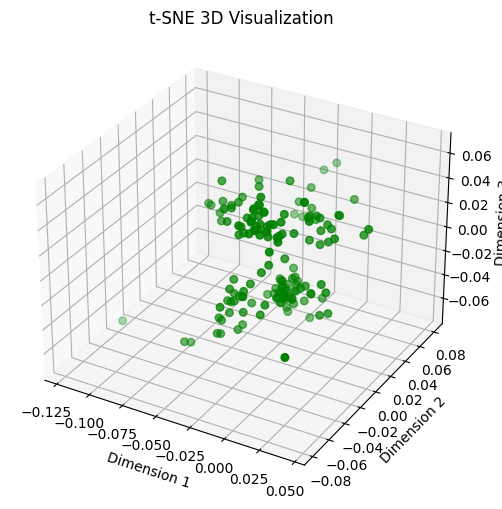

In [145]:
tsne2_2 = TSNE(n_components=3, perplexity=159, random_state=0)
reduced_data_2 = tsne2_2.fit_transform(data_2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data_2[:, 0], reduced_data_2[:, 1], reduced_data_2[:, 2],
           c='g', marker='o', s=30)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('t-SNE 3D Visualization')

plt.show()

In [ ]:
#OPTION 2 PCA:
#Linear dimensionality reduction technique.
#Projects data onto the principal components with the highest variance.

Tokenized versions of data can also be exported using tensorflow as shown here: <br> https://github.com/AyeshaShafique/bert-feature-extraction-tf-2.0/blob/master/bert_embeddings_with_tensorflow_2_0.ipynb

In [153]:
#inputs after they have been tokenized
# Are these SEP (Sentence Embedding) or Average Word Embeddings (AWE)
for i in range(len(raw_inputs)):
  inputs = tokenizer(raw_inputs[i], padding=True, truncation=True, return_tensors="pt")
  print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[ 101, 1045, 2293, 2023, 2061, 2172,  999,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
{'input_ids': tensor([[  101, 19544,  2213, 12997, 17421,  2079, 10626,  4133,  2572,  3388,
          1010,  9530,  3366,  6593,  3388,  3126, 27133, 18136,  6129, 12005,
          2102,  1010,  7367,  2094,  2079,  1041,  4173,  5302,  2094, 13657,
          2099,  4297, 28173, 27584,  2102, 21183,  4450,  2063,  3802,  2079,
         20186, 20201,  4862, 16211,  1012, 21183,  4372,  5714,  4748,  7163,
          2213,  2310,  6200,  2213,  1010, 21864,  2015, 16839, 16344,  6784,
          4654,  2121, 26243,  3370, 17359, 10278,  3597,  4450,  2483,  9152,
          5332, 21183,  4862, 15549,  2361,  4654, 19413,  4012,  5302,  3527,
 

In [5]:
#Setting up tokenizer to see how the word vectors get processed
from transformers import AutoTokenizer
ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(ckpt)

In [ ]:
#Automodel
from transformers import AutoModel
checkpoint = "distilbert-base-uncased"
model = AutoModel.from_pretrained(checkpoint)
#model.predict(raw_inputs)??

# TODO

- Represent Embeddings xx
- Represent postprocess
- Fine Tune model
- Represent new embeddings
- Represent new postporocess
<p>
- GET SEP Embeddings (Get SEP Token)
- Get average Sentence Embeddings
- Experiment with SBERT

In [ ]:
#Importing proper dataset:
import datasets
from datasets import load_dataset, load_metric

#Setup General Language Understanding Evaluation tasks
GLUE_TASKS = ["cola", "mnli", "mnli-mm", "mrpc", "qnli", "qqp", "rte", "sst2", "stsb", "wnli"]

# MisMatched Multi Natural Language Inference task is chosen.
task = "mnli_mismatched"
model_checkpoint = 'distilbert-base-uncased'
batch_size = 16

dataset = load_dataset("glue", task)
metric = load_metric('glue', task)

In [ ]:
print(type(dataset), "\n", dataset)
print(metric)

In [ ]:
inputs2 = tokenizer(dataset, padding=True, truncation = True, return_tensors="pt")
print(inputs2)

In [ ]:
# Extract the test dataset from the DatasetDict
test_dataset = dataset["test"]

# Extract premise and hypothesis columns
premises = test_dataset["premise"]
hypotheses = test_dataset["hypothesis"]
combined_texts = [premise + " [SEP] " + hypothesis for premise, hypothesis in zip(premises, hypotheses)]


In [ ]:
embeddings = embedder0(combined_texts)
